# 서울에 있는 프랜차이즈 분석
    *저번 분석에서는 서울에 있는 상가업종과 입시학원을 분석했다.
    *이번 분석에서는 서울에 있는 프랜차이즈 전문점을 분석할 예정이다.
    *치킨갤러리라는 치킨을 좋아하는 사람들이 모인 곳에서 치킨 브랜드 순위를 정했었다.
    *1위는 bbq(황금올리브치킨), 2위는 bhc(뿌링클)이였다.
    *따라서 과연 사람들이 좋아하는 만큼 많은 가게가 있는지 분석할 예정이다.

## 분석 환경 준비

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 한글 폰트 설정
plt.rc("font", family = "Malgun Gothic")

In [4]:
# data폴더 안에 있는 파일 보기
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 9AB7-47B5

 C:\Users\dirhq\프랜차이즈 분석\data 디렉터리

2020-12-03  오전 10:54    <DIR>          .
2020-12-03  오전 10:54    <DIR>          ..
2020-11-30  오전 11:16            57,732 seoul_municipalities_geo_simple.json
2020-11-30  오후 11:17       264,920,940 상가업소정보_201912_01.csv
               2개 파일         264,978,672 바이트
               2개 디렉터리  29,579,055,104 바이트 남음


In [5]:
# 데이터 불러오기
# 불러오는 데이터는 2019년 12월에 서울과 부산에 등록되어있는 업소들이다. 
df = pd.read_csv("data/상가업소정보_201912_01.csv", sep="|")

In [6]:
# 데이터 크기보기
df.shape

(573680, 39)

In [7]:
# 데이터 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

## 데이터 전처리

In [8]:
# 이전 분석에서는 drop을 이용해서 전처리를 하였지만 이번 분석에서는 따로 모아서 전처리를 한다
# df.shape를 통해 쓰지 않는 컬럼이 제거된 것을 볼 수 있다.
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명',
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', '경도', '위도']
print(df.shape)
df = df[columns].copy()
print(df.shape)

(573680, 39)
(573680, 11)


## 색인을 통해 서브셋 만들기

In [9]:
# 시도명이 서울특별시인 것만 가져오기
df_seoul = df[df["시도명"]=="서울특별시"].copy()
df_seoul

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149
...,...,...,...,...,...,...,...,...,...,...,...
573675,비파티세리공덕,음식,한식,한식/백반/한정식,서울특별시,마포구,공덕동,공덕동,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
573676,앤탑PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,성동구,성수2가3동,성수동2가,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
573677,오즈아레나PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,강남구,논현1동,논현동,서울특별시 강남구 강남대로 492,127.024102,37.506202
573678,파인트리네일,생활서비스,이/미용/건강,발/네일케어,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 국제금융로 10,126.924863,37.525172


## 파일로 저장
    *서울특별시만 뽑은 세브셋을 파일로 저장

In [10]:
# seoul_open_store.csv라는 이름으로 저장
df_seoul.to_csv("seoul_open_store.csv", index=False)

In [11]:
pd.read_csv("seoul_open_store.csv")

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
4,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149
...,...,...,...,...,...,...,...,...,...,...,...
407371,비파티세리공덕,음식,한식,한식/백반/한정식,서울특별시,마포구,공덕동,공덕동,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
407372,앤탑PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,성동구,성수2가3동,성수동2가,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
407373,오즈아레나PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,강남구,논현1동,논현동,서울특별시 강남구 강남대로 492,127.024102,37.506202
407374,파인트리네일,생활서비스,이/미용/건강,발/네일케어,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 국제금융로 10,126.924863,37.525172


## BBQ와 BHC 데이터 모델링 및 전처리

In [12]:
# 상호명에 대문자와 소문자가 섞여 있을 수 있으니 소문자로 통일
# 상호명_소문자 컬럼을 만든다.
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

In [13]:
# bbq를 상호명_소문자 컬럼으로 가져온다.
# 상호명_소문자 컬럼으로 비비큐|bbq를 가져와 갯수를 센다.
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("비비큐|bbq"), "상호명_소문자"]

8939             비비큐치킨앤비어
14009             bbq종로6가
14732               bbq치킨
15241            bbq치킨안국점
15321     비비큐참숯바베큐치킨영등포본점
               ...       
548412              bbq치킨
554595              bbq치킨
561355              bbq치킨
566159              bbq치킨
568387              bbq치킨
Name: 상호명_소문자, Length: 251, dtype: object

In [14]:
# bhc도 같은 방법으로 구해본다
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("비에이치씨|bhc"), "상호명_소문자"]

2942      bhc치킨은평뉴타운점
5018            bhc치킨
8428            bhc치킨
13477           bhc치킨
14088           bhc치킨
             ...     
543262          bhc치킨
560199          bhc치킨
564544          bhc치킨
570407          bhc치킨
570886          bhc치킨
Name: 상호명_소문자, Length: 221, dtype: object

In [15]:
# 상호명_소문자 컬럼으로 비비큐|bbq|비에이치씨|bhc를 가져와 df_chicken 변수에 담는다.
df_chicken = df_seoul[df_seoul["상호명_소문자"].str.contains("비비큐|bbq|비에이치씨|bhc")].copy()
df_chicken

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
2942,BHC치킨은평뉴타운점,음식,닭/오리요리,후라이드/양념치킨,서울특별시,은평구,진관동,진관동,서울특별시 은평구 진관4로 47,126.927183,37.645842,bhc치킨은평뉴타운점
5018,BHC치킨,음식,닭/오리요리,후라이드/양념치킨,서울특별시,관악구,미성동,신림동,서울특별시 관악구 난우길 36,126.917801,37.476010,bhc치킨
8428,BHC치킨,음식,닭/오리요리,후라이드/양념치킨,서울특별시,동작구,노량진1동,노량진동,서울특별시 동작구 만양로 110,126.944423,37.513185,bhc치킨
8939,비비큐치킨앤비어,음식,유흥주점,호프/맥주,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 의사당대로 110,126.923973,37.521001,비비큐치킨앤비어
13477,BHC치킨,음식,닭/오리요리,후라이드/양념치킨,서울특별시,동작구,상도4동,상도동,서울특별시 동작구 성대로 167,126.939568,37.498959,bhc치킨
...,...,...,...,...,...,...,...,...,...,...,...,...
564544,BHC치킨,음식,닭/오리요리,후라이드/양념치킨,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 국회대로72길 11,126.920812,37.529965,bhc치킨
566159,BBQ치킨,음식,분식,라면김밥분식,서울특별시,서대문구,천연동,냉천동,서울특별시 서대문구 독립문로14길 3,126.963963,37.566817,bbq치킨
568387,BBQ치킨,음식,닭/오리요리,후라이드/양념치킨,서울특별시,구로구,구로2동,구로동,서울특별시 구로구 구로동로28길 37,126.886206,37.490908,bbq치킨
570407,BHC치킨,음식,유흥주점,호프/맥주,서울특별시,용산구,용산2가동,용산동2가,서울특별시 용산구 신흥로 83,126.985850,37.545427,bhc치킨


In [16]:
# BBQ 브랜드명 넣기
df_chicken.loc[df_chicken["상호명_소문자"].str.contains("비비큐|bbq"), "브랜드명"] = "BBQ"
df_chicken[["상호명","브랜드명"]].head()

,상호명,브랜드명
2942,BHC치킨은평뉴타운점,NaN
5018,BHC치킨,NaN
8428,BHC치킨,NaN
8939,비비큐치킨앤비어,BBQ
13477,BHC치킨,NaN


In [17]:
# BHC 브랜드명 넣기
# 브랜드명에 NaN 값들을 BHC로 채우기
df_chicken["브랜드명"] = df_chicken["브랜드명"].fillna("BHC")
df_chicken["브랜드명"]

2942      BHC
5018      BHC
8428      BHC
8939      BBQ
13477     BHC
         ... 
564544    BHC
566159    BBQ
568387    BBQ
570407    BHC
570886    BHC
Name: 브랜드명, Length: 472, dtype: object

In [19]:
# 데이터가 제대로 모였는지 확인
# 음식업종이 아닌 소매 업종이 있는 것을 확인
df_chicken["상권업종대분류명"].value_counts()

음식    471
소매      1
Name: 상권업종대분류명, dtype: int64

In [21]:
# 소매 업종 데이터만 가져오기
df_chicken[df_chicken["상권업종대분류명"] == "소매"]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
45461,BBQ치킨,소매,가구소매,가구판매-수입가구,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 구의로16길 89,127.094375,37.541677,bbq치킨,BBQ


In [23]:
# 상권업종대분류명에서 소매 업종은 제외
df_chicken = df_chicken[df_chicken["상권업종대분류명"] != "소매"]
df_chicken


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
2942,BHC치킨은평뉴타운점,음식,닭/오리요리,후라이드/양념치킨,서울특별시,은평구,진관동,진관동,서울특별시 은평구 진관4로 47,126.927183,37.645842,bhc치킨은평뉴타운점,BHC
5018,BHC치킨,음식,닭/오리요리,후라이드/양념치킨,서울특별시,관악구,미성동,신림동,서울특별시 관악구 난우길 36,126.917801,37.476010,bhc치킨,BHC
8428,BHC치킨,음식,닭/오리요리,후라이드/양념치킨,서울특별시,동작구,노량진1동,노량진동,서울특별시 동작구 만양로 110,126.944423,37.513185,bhc치킨,BHC
8939,비비큐치킨앤비어,음식,유흥주점,호프/맥주,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 의사당대로 110,126.923973,37.521001,비비큐치킨앤비어,BBQ
13477,BHC치킨,음식,닭/오리요리,후라이드/양념치킨,서울특별시,동작구,상도4동,상도동,서울특별시 동작구 성대로 167,126.939568,37.498959,bhc치킨,BHC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564544,BHC치킨,음식,닭/오리요리,후라이드/양념치킨,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 국회대로72길 11,126.920812,37.529965,bhc치킨,BHC
566159,BBQ치킨,음식,분식,라면김밥분식,서울특별시,서대문구,천연동,냉천동,서울특별시 서대문구 독립문로14길 3,126.963963,37.566817,bbq치킨,BBQ
568387,BBQ치킨,음식,닭/오리요리,후라이드/양념치킨,서울특별시,구로구,구로2동,구로동,서울특별시 구로구 구로동로28길 37,126.886206,37.490908,bbq치킨,BBQ
570407,BHC치킨,음식,유흥주점,호프/맥주,서울특별시,용산구,용산2가동,용산동2가,서울특별시 용산구 신흥로 83,126.985850,37.545427,bhc치킨,BHC


In [39]:
# 소매 업종 제외
df_chicken["상권업종대분류명"].value_counts()

음식    471
Name: 상권업종대분류명, dtype: int64

In [40]:
# 상호명 전체값 보기
# 여기서 고릴라 bbq스테이크, 피자콘엔비에이치씨, 비비큐올리브떡볶이가 있는것을 볼 수 있다
df_chicken["상호명"].unique()

array(['BHC치킨은평뉴타운점', 'BHC치킨', '비비큐치킨앤비어', 'BBQ종로6가', 'BBQ치킨', 'BBQ치킨안국점',
       '비비큐참숯바베큐치킨영등포본점', 'BBQ치킨이문동점', 'bhc비어존', 'BHC치킨미래점', '비비큐올리브떡볶이',
       'BHC치킨풍납점', 'BHC치킨서초내곡점', 'BHCBeerZone', 'BBQ치킨앤비어', 'BBQ치킨정릉행복점',
       '비에이치씨비어존', 'BBQ치킨대방점', 'BBQ치킨내곡포레스타점', '비비큐참숯바베큐', 'BBQ참숯바베큐치킨',
       'BHC비어존', 'BBQ치킨우면점', 'BBQ치킨마포도화점', 'BBQ치킨가산점', 'BHC치킨천왕점',
       'BHC치킨북한산점', 'BHC치킨돈암스카이점', 'BHC치킨봉천청룡점', '비비큐올떡', 'BHC치킨위례점',
       '비비큐분식', 'BBQ치킨쌍문행복점', '비에이치씨문정근', '비비큐까페', '비비큐올리브떡볶이시흥벽산',
       '펜션BBQ', '제너시스비비큐서울대', 'BBQ참숯바베큐', 'BBQ올리브돈까스', '비비큐어린이대공원스',
       '제너시스비비큐동의점', '여의나루비비큐치킨피자큐', 'BHC치킨서울대점', 'BHC치킨개봉점', 'BHC치킨&뿔난신',
       '정원BHC', 'BBQ치킨구로디지털점', 'BBQ와타미종로2호점', 'BBQ올떡볶이', 'BBQ치킨마포용강점',
       'BHC치킨성산행복점', 'BBQ치킨피자큐', 'BHC치킨방이점', 'BBQ치킨1000호점', 'LOCOSBBQ',
       'BHC치킨대치개포점', 'BBQ치킨전농점', 'BHC치킨내발산점', 'BBQ치킨까치산점', 'BBQ참숯바베큐낙성대점',
       'BHC치킨구의점', 'BBQ치킨신촌역점', '비에이치씨치킨보라매공원점', 'BBQ치킨보라매공원점',
       'BHC치킨독산맛나거리점', 'BHC치킨마들점', 'BHC치킨송정역점', 'BBQ치킨상도점',
       'BBQ치킨

In [42]:
# 관련없는 내용 제거
print(df_chicken.shape)
df_chicken = df_chicken[~df_chicken["상호명"].str.contains("고릴라|떡볶이,피자")]
print(df_chicken.shape)

(469, 13)
(469, 13)


## 서울에 있는 BBQ, BHC 개수 그래프 그리기

In [43]:
# 개수 보기
chicken_count = df_chicken["브랜드명"].value_counts()
chicken_count

BBQ    248
BHC    221
Name: 브랜드명, dtype: int64

Text(0, 221, '221')

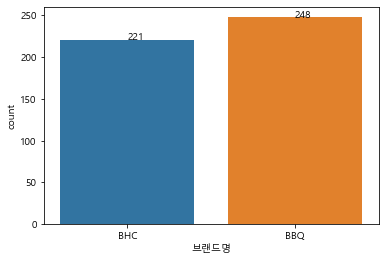

In [44]:
# 그래프를 통한 개수 비교
g = sns.countplot(data=df_chicken, x="브랜드명")

g.text(x=1, y=chicken_count[0],s=chicken_count[0])
g.text(x=0, y=chicken_count[1],s=chicken_count[1])

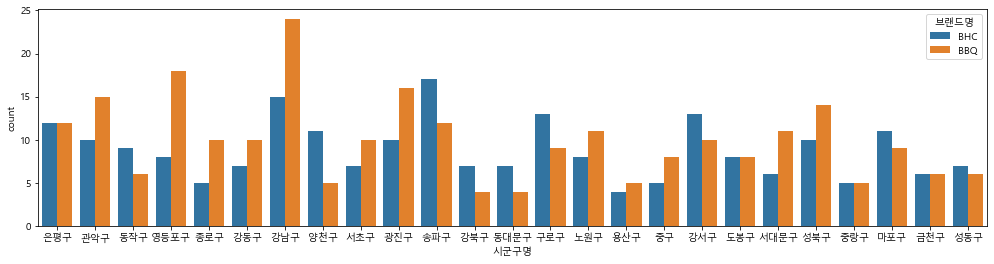

In [45]:
# 시군구명에 따른 빈도수
plt.figure(figsize=(17,4))

g = sns.countplot(data=df_chicken, x="시군구명", hue="브랜드명")

## 지도에 표현

In [46]:
df_chicken.index

Int64Index([  2942,   5018,   8428,   8939,  13477,  14009,  14088,  14732,
             14917,  15241,
            ...
            544404, 548412, 554595, 560199, 561355, 564544, 566159, 568387,
            570407, 570886],
           dtype='int64', length=469)

In [48]:
import folium
from folium.plugins import MarkerCluster

In [52]:
#지도의 중심을 구하기 위해 위도 경도의 평균을 구함
lat = df_chicken["위도"].mean()
long = df_chicken["경도"].mean()

In [54]:
m = folium.Map([lat, long], zoom_start = 12, tiles="Stamen toner")

for i in df_chicken.index:
    sub_lat = df_chicken.loc[i,"위도"]
    sub_long = df_chicken.loc[i,"경도"]
    
    title = df_chicken.loc[i, "상호명"] + "-" + df_chicken.loc[i, "도로명주소"]
    icon_color = "blue"
    if df_chicken.loc[i,"브랜드명"] == "BBQ":
        icon_color = "green"
    folium.CircleMarker(
        location=[sub_lat, sub_long],
        radius=3,
        color=icon_color,
        popup=title,
        tooltip=title).add_to(m)
m

In [55]:
# MarkerCluster 맵 그리기

m = folium.Map([lat, long], zoom_start = 11)
marker_cluster = MarkerCluster().add_to(m)

for i in df_chicken.index:
    sub_lat = df_chicken.loc[i,"위도"]
    sub_long = df_chicken.loc[i,"경도"]
    title = df_chicken.loc[i,"상호명"] + "-" +df_chicken.loc[i,"도로명주소"]
    
    icon_color = "blue"
    if df_chicken.loc[i,"브랜드명"] == "던킨도너츠":
        icon_color = "red"
    
    folium.Marker(
        [sub_lat, sub_long],
        icon=folium.Icon(color=icon_color),
        popup=title,
        tooltip=title).add_to(marker_cluster)
    
m

In [59]:
#히트맵이 되기 위해선 다 숫자여야한다
heat = df_chicken[["위도", "경도", "브랜드명"]].copy()
heat["브랜드명"] = heat["브랜드명"].replace("BHC",1).replace("BBQ",1)
heat.values

array([[ 37.64584188, 126.92718278,   1.        ],
       [ 37.47600968, 126.91780067,   1.        ],
       [ 37.51318455, 126.94442295,   1.        ],
       ...,
       [ 37.49090772, 126.88620581,   1.        ],
       [ 37.54542658, 126.9858504 ,   1.        ],
       [ 37.48141867, 126.88037678,   1.        ]])

In [64]:
# heatmap 맵 그리기
from folium.plugins import HeatMap


m = folium.Map([lat, long], tiles="stamentoner", zoom_start=12)

HeatMap(heat).add_to(m)
for i in df_chicken.index:
    sub_lat = df_chicken.loc[i,"위도"]
    sub_long = df_chicken.loc[i,"경도"]
    
    title = df_chicken.loc[i, "상호명"] + "-" + df_chicken.loc[i, "도로명주소"]
    icon_color = "blue"
    if df_chicken.loc[i,"브랜드명"] == "BBQ":
        icon_color = "red"
    folium.CircleMarker(
        location=[sub_lat, sub_long],
        radius=3,
        color=icon_color,
        popup=title,
        tooltip=title).add_to(m)
m